In [4]:
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
#import seaborn as sn
#import pickle 
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from PIL import Image, ImageFile
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.densenet import DenseNet121
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPool2D, Activation, Dropout, Flatten,Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from keras import regularizers
from keras import backend as K
import keras 
from keras import optimizers
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [5]:
df = pd.read_csv('train_list.csv')

FileNotFoundError: [Errno 2] File b'train_list.csv' does not exist: b'train_list.csv'

In [3]:
val_df = pd.read_csv('val_list.csv')

In [4]:
pneumothorax_df = df.loc[df['Pneumothorax'] == 1]

In [5]:
other_df = df.loc[df['Pneumothorax']!=1]

In [6]:
pneumothorax_df = pneumothorax_df.drop(['Atelectasis','Cardiomegaly','Effusion','Infiltration','Mass','Nodule','Pneumonia','Consolidation','Edema','Emphysema','Fibrosis','Pleural_Thickening','Hernia'],axis=1)

In [7]:
pneumothorax_df

,Name,Pneumothorax
3,00023313_002.png,1
7,00023313_006.png,1
8,00023313_007.png,1
10,00023313_009.png,1
11,00023313_010.png,1
43,00014602_000.png,1
92,00022248_004.png,1
117,00008468_016.png,1
123,00008468_022.png,1
124,00008468_023.png,1


In [8]:
other_df = other_df.drop(['Atelectasis','Cardiomegaly','Effusion','Infiltration','Mass','Nodule','Pneumonia','Consolidation','Edema','Emphysema','Fibrosis','Pleural_Thickening','Hernia'],axis=1)

In [9]:
train_df = pd.concat([pneumothorax_df,other_df])

In [10]:
train_df

,Name,Pneumothorax
3,00023313_002.png,1
7,00023313_006.png,1
8,00023313_007.png,1
10,00023313_009.png,1
11,00023313_010.png,1
43,00014602_000.png,1
92,00022248_004.png,1
117,00008468_016.png,1
123,00008468_022.png,1
124,00008468_023.png,1


In [11]:
train_df.reset_index()

,index,Name,Pneumothorax
0,3,00023313_002.png,1
1,7,00023313_006.png,1
2,8,00023313_007.png,1
3,10,00023313_009.png,1
4,11,00023313_010.png,1
5,43,00014602_000.png,1
6,92,00022248_004.png,1
7,117,00008468_016.png,1
8,123,00008468_022.png,1
9,124,00008468_023.png,1


In [12]:
train_df = train_df.reset_index(drop=True)

In [13]:
val_pneumothorax_df = val_df.loc[val_df['Pneumothorax'] == 1]

In [14]:
val_other_df = val_df.loc[val_df['Pneumothorax'] != 1]

In [15]:
val_pneumothorax_df = val_pneumothorax_df.drop(['Atelectasis','Cardiomegaly','Effusion','Infiltration','Mass','Nodule','Pneumonia','Consolidation','Edema','Emphysema','Fibrosis','Pleural_Thickening','Hernia'],axis=1)

In [16]:
val_other_df = val_other_df.drop(['Atelectasis','Cardiomegaly','Effusion','Infiltration','Mass','Nodule','Pneumonia','Consolidation','Edema','Emphysema','Fibrosis','Pleural_Thickening','Hernia'],axis=1)

In [17]:
val_df = pd.concat([val_pneumothorax_df,val_other_df])

In [18]:
val_df

,Name,Pneumothorax
10,00008473_004.png,1
11,00008473_005.png,1
43,00011379_000.png,1
66,00011379_023.png,1
67,00011379_024.png,1
68,00011379_025.png,1
72,00011379_029.png,1
73,00011379_030.png,1
75,00011379_032.png,1
76,00011379_033.png,1


In [19]:
val_df.reset_index()

,index,Name,Pneumothorax
0,10,00008473_004.png,1
1,11,00008473_005.png,1
2,43,00011379_000.png,1
3,66,00011379_023.png,1
4,67,00011379_024.png,1
5,68,00011379_025.png,1
6,72,00011379_029.png,1
7,73,00011379_030.png,1
8,75,00011379_032.png,1
9,76,00011379_033.png,1


In [20]:
val_df = val_df.reset_index(drop=True)

In [21]:
val_df

,Name,Pneumothorax
0,00008473_004.png,1
1,00008473_005.png,1
2,00011379_000.png,1
3,00011379_023.png,1
4,00011379_024.png,1
5,00011379_025.png,1
6,00011379_029.png,1
7,00011379_030.png,1
8,00011379_032.png,1
9,00011379_033.png,1


In [22]:
oversampling = RandomOverSampler(random_state=0)

In [23]:
x_train = pd.DataFrame(train_df.iloc[:,0:1])

In [24]:
x_train

,Name
0,00023313_002.png
1,00023313_006.png
2,00023313_007.png
3,00023313_009.png
4,00023313_010.png
5,00014602_000.png
6,00022248_004.png
7,00008468_016.png
8,00008468_022.png
9,00008468_023.png


In [25]:
y_train = pd.DataFrame(train_df.iloc[:,-1])

In [26]:
x_val =pd.DataFrame(val_df.iloc[:,0:1])

In [27]:
y_val = pd.DataFrame(val_df.iloc[:,-1])

In [28]:
os_x_train, os_y_train = oversampling.fit_sample(x_train.values, y_train.values)

/opt/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
os_x_train = pd.DataFrame(os_x_train)

In [30]:
os_y_train = pd.DataFrame(os_y_train)

In [31]:
os_train_df = pd.concat([os_x_train,os_y_train],axis=1)

In [32]:
os_train_df.columns= ['Name','labels']

In [33]:
os_train_df

,Name,labels
0,00023313_002.png,1
1,00023313_006.png,1
2,00023313_007.png,1
3,00023313_009.png,1
4,00023313_010.png,1
5,00014602_000.png,1
6,00022248_004.png,1
7,00008468_016.png,1
8,00008468_022.png,1
9,00008468_023.png,1


In [34]:
 sum(os_train_df.values[:,-1]==1)

74763

In [35]:
 sum(os_train_df.values[:,-1]==0)

74763

In [36]:
os_x_val, os_y_val = oversampling.fit_sample(x_val.values,y_val.values)

/opt/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
os_x_val = pd.DataFrame(os_x_val)

In [38]:
os_y_val = pd.DataFrame(os_y_val)

In [39]:
os_x_val

,0
0,00008473_004.png
1,00008473_005.png
2,00011379_000.png
3,00011379_023.png
4,00011379_024.png
5,00011379_025.png
6,00011379_029.png
7,00011379_030.png
8,00011379_032.png
9,00011379_033.png


In [40]:
os_val_df = pd.concat([os_x_val,os_y_val],axis=1)

In [41]:
os_val_df

,0,0
0,00008473_004.png,1
1,00008473_005.png,1
2,00011379_000.png,1
3,00011379_023.png,1
4,00011379_024.png,1
5,00011379_025.png,1
6,00011379_029.png,1
7,00011379_030.png,1
8,00011379_032.png,1
9,00011379_033.png,1


In [42]:
 sum(os_val_df.values[:,-1]==1)

10715

In [43]:
 sum(os_val_df.values[:,-1]==0)

10715

In [44]:
K.set_learning_phase(1)
img_width, img_height = 221,221
epochs = 25
nb_train_samples = 149526
nb_validation_samples = 11219
batch_size = 16

In [45]:
train_data_dir = 'train_list/'
val_data_dir = 'val_list/'

In [46]:
train_datagen = ImageDataGenerator(rescale=1. / 255, zoom_range=0.2,rotation_range = 5,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [47]:
os_train_df

,Name,labels
0,00023313_002.png,1
1,00023313_006.png,1
2,00023313_007.png,1
3,00023313_009.png,1
4,00023313_010.png,1
5,00014602_000.png,1
6,00022248_004.png,1
7,00008468_016.png,1
8,00008468_022.png,1
9,00008468_023.png,1


In [48]:
train_generator = train_datagen.flow_from_dataframe(dataframe=os_train_df, directory=train_data_dir, x_col='Name', y_col='labels', has_ext=True, class_mode="binary", target_size=(img_height,img_width), batch_size=batch_size,shuffle=False)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image.py:2059: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.df[x_col] = self.df[x_col].astype(str)


Found 78468 images belonging to 2 classes.


In [49]:
os_val_df.columns = ['Name','labels']

In [50]:
os_val_df

,Name,labels
0,00008473_004.png,1
1,00008473_005.png,1
2,00011379_000.png,1
3,00011379_023.png,1
4,00011379_024.png,1
5,00011379_025.png,1
6,00011379_029.png,1
7,00011379_030.png,1
8,00011379_032.png,1
9,00011379_033.png,1


In [51]:
val_generator = test_datagen.flow_from_dataframe(dataframe=val_df,directory=val_data_dir, x_col='Name', y_col='Pneumothorax', has_ext=True,class_mode="binary",target_size=(img_height,img_width),shuffle=False)

Found 11219 images belonging to 2 classes.


In [52]:
def build_model():
    base_model = DenseNet121(input_shape=(img_width,img_height,3),weights=None,include_top=False, pooling='avg')
    for layers in base_model.layers:
        layers.trainable = True
        x = base_model.output
        x = Dense(1000, kernel_regularizer=regularizers.l1_l2(0.01),activity_regularizer=regularizers.l2(0.01))(x)
        x = Activation('tanh')(x)
        x = Dense(500,kernel_regularizer=regularizers.l1_l2(0.01),activity_regularizer=regularizers.l2(0.01))(x)
        x = Activation('tanh')(x)
        predictions = Dense(1,activation='sigmoid')(x)
        model = Model(inputs=base_model.input, outputs=predictions)
        return model

In [53]:
model = build_model()
optimizer = optimizers.Adam(lr=0.001, decay=0.0)
model.compile(loss='binary_crossentropy',optimizer=optimizer, metrics=['acc','mse'])

In [54]:
early_stop = EarlyStopping(monitor='val_loss', patience=8, verbose=1, min_delta=1e-4)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=1, min_delta=1e-4)
callbacks_list = [early_stop, reduce_lr]

In [55]:
model_history = model.fit_generator(
    train_generator,
    epochs=epochs,
    steps_per_epoch = nb_train_samples // batch_size,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=callbacks_list)

Epoch 1/25
9345/9345 [==============================] - 5089s 545ms/step - loss: 3.6522 - acc: 0.9539 - mean_squared_error: 0.0458 - val_loss: 1.9286 - val_acc: 0.9551 - val_mean_squared_error: 0.0432
Epoch 2/25
9345/9345 [==============================] - 5063s 542ms/step - loss: 1.9543 - acc: 0.9532 - mean_squared_error: 0.0453 - val_loss: 1.9689 - val_acc: 0.9554 - val_mean_squared_error: 0.0428
Epoch 3/25
9345/9345 [==============================] - 5063s 542ms/step - loss: 1.9789 - acc: 0.9530 - mean_squared_error: 0.0452 - val_loss: 1.9843 - val_acc: 0.9554 - val_mean_squared_error: 0.0428
Epoch 4/25
9345/9345 [==============================] - 5063s 542ms/step - loss: 1.9851 - acc: 0.9528 - mean_squared_error: 0.0452 - val_loss: 1.9827 - val_acc: 0.9550 - val_mean_squared_error: 0.0431
Epoch 5/25
9345/9345 [==============================] - 5066s 542ms/step - loss: 1.9905 - acc: 0.9526 - mean_squared_error: 0.0452 - val_loss: 1.9903 - val_acc: 0.9550 - val_mean_squared_error: 0.

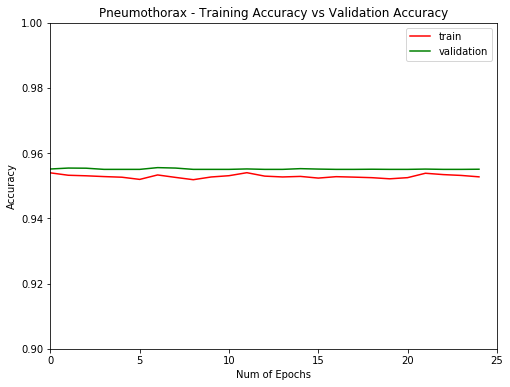

In [58]:
plt.figure(0)
plt.plot(model_history.history['acc'],'r')
plt.plot(model_history.history['val_acc'],'g')
plt.axis([0,25,0.9,1.0])
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Pneumothorax - Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

In [66]:
test_file = pd.read_csv('test_list.csv')

In [67]:
test_file

,Name,Atelectasis,Cardiomegaly,Effusion,Infiltration,Mass,Nodule,Pneumonia,Pneumothorax,Consolidation,Edema,Emphysema,Fibrosis,Pleural_Thickening,Hernia
0,00011997_000.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00011997_001.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,00011997_002.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,00011997_003.png,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,00011997_004.png,0,1,1,1,0,0,0,0,0,0,0,0,0,0
5,00011997_005.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,00011997_006.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,00011997_007.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,00011997_008.png,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,00011997_009.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [68]:
test_pneumothorax_df = test_file.loc[test_file['Pneumothorax'] == 1]
test_other_df = test_file.loc[test_file['Pneumothorax'] != 1]
test_pneumothorax_df = test_pneumothorax_df.drop(['Atelectasis','Cardiomegaly','Effusion','Infiltration','Mass','Nodule','Pneumonia','Consolidation','Edema','Emphysema','Fibrosis','Pleural_Thickening','Hernia'],axis=1)
test_other_df = test_other_df.drop(['Atelectasis','Cardiomegaly','Effusion','Infiltration','Mass','Nodule','Pneumonia','Consolidation','Edema','Emphysema','Fibrosis','Pleural_Thickening','Hernia'],axis=1)
test_df = pd.concat([test_pneumothorax_df,test_other_df])
test_df.reset_index()
test_df = test_df.reset_index(drop=True)
test_df

,Name,Pneumothorax
0,00017943_001.png,1
1,00001756_011.png,1
2,00001756_016.png,1
3,00010834_001.png,1
4,00009350_004.png,1
5,00027697_004.png,1
6,00027697_005.png,1
7,00027697_006.png,1
8,00027697_007.png,1
9,00027697_008.png,1


In [69]:
 sum(test_df.values[:,-1]==1)

1089

In [70]:
 sum(test_df.values[:,-1]==0)

21344

In [89]:
test_generator = test_datagen.flow_from_directory(
    directory='test_list/',
   target_size=(img_height,img_width), batch_size=1,shuffle=False)

Found 22433 images belonging to 1 classes.


In [90]:
scores = model.evaluate_generator(generator=test_generator,steps=22433,verbose=1)

22433/22433 [==============================] - 754s 34ms/step


In [149]:
scores

[0.04923929274082184, 1.0, 0.002291466575115919]

In [152]:
y_pred = model.predict_generator(test_generator, steps = 22433,verbose=1)

22433/22433 [==============================] - 737s 33ms/step


In [153]:
from sklearn import metrics

In [197]:
target_names = ['0','1']

In [204]:
f1_scores = metrics.classification_report(y_true,y_pred.round(),target_names=target_names)

/opt/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [205]:
print(f1_scores)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     21344
           1       0.05      1.00      0.09      1089

   micro avg       0.05      0.05      0.05     22433
   macro avg       0.02      0.50      0.05     22433
weighted avg       0.00      0.05      0.00     22433



In [206]:
acc_score = metrics.accuracy_score(y_true,y_pred.round(),normalize=False)

In [207]:
acc_score

1089

In [208]:
auc_roc_score = metrics.roc_auc_score(y_true,y_pred.round())

In [209]:
auc_roc_score

0.5

# Testing as numpy array

In [ ]:
import cv2
import glob
import numpy as np

X_data = []
files = glob.glob ("test_list/test/*.png")
for myFile in files:
    print(myFile)
    image = cv2.imread (myFile)
    X_data.append (image)

print('X_data shape:', np.array(X_data).shape)

test_list/test/00018840_025.png
test_list/test/00030479_000.png
test_list/test/00005707_000.png
test_list/test/00023128_000.png
test_list/test/00027556_006.png
test_list/test/00015442_027.png
test_list/test/00018259_007.png
test_list/test/00022572_070.png
test_list/test/00009035_000.png
test_list/test/00002704_014.png
test_list/test/00000621_013.png
test_list/test/00019373_060.png
test_list/test/00018746_000.png
test_list/test/00018680_012.png
test_list/test/00027871_000.png
test_list/test/00005806_004.png
test_list/test/00010338_010.png
test_list/test/00019018_015.png
test_list/test/00012060_008.png
test_list/test/00010294_004.png
test_list/test/00000583_036.png
test_list/test/00007076_003.png
test_list/test/00010356_000.png
test_list/test/00018225_002.png
test_list/test/00012628_052.png
test_list/test/00008990_000.png
test_list/test/00019786_006.png
test_list/test/00016587_033.png
test_list/test/00011371_003.png
test_list/test/00026562_017.png
test_list/test/00011709_000.png
test_lis

test_list/test/00022470_001.png
test_list/test/00020548_000.png
test_list/test/00014360_000.png
test_list/test/00028890_001.png
test_list/test/00015222_004.png
test_list/test/00016550_025.png
test_list/test/00015995_002.png
test_list/test/00015743_000.png
test_list/test/00006790_003.png
test_list/test/00015747_000.png
test_list/test/00006098_007.png
test_list/test/00001549_009.png
test_list/test/00027118_000.png
test_list/test/00027177_001.png
test_list/test/00008563_007.png
test_list/test/00001733_001.png
test_list/test/00015071_005.png
test_list/test/00014035_000.png
test_list/test/00009107_008.png
test_list/test/00019713_001.png
test_list/test/00022155_027.png
test_list/test/00000211_017.png
test_list/test/00018898_003.png
test_list/test/00009142_003.png
test_list/test/00011688_010.png
test_list/test/00018921_014.png
test_list/test/00000121_008.png
test_list/test/00026725_007.png
test_list/test/00010531_060.png
test_list/test/00012414_007.png
test_list/test/00015995_009.png
test_lis

test_list/test/00005528_001.png
test_list/test/00007560_000.png
test_list/test/00006010_000.png
test_list/test/00012832_007.png
test_list/test/00024206_000.png
test_list/test/00013567_001.png
test_list/test/00001452_002.png
test_list/test/00002344_011.png
test_list/test/00029340_000.png
test_list/test/00029815_000.png
test_list/test/00012832_001.png
test_list/test/00007296_002.png
test_list/test/00015013_010.png
test_list/test/00020424_002.png
test_list/test/00006228_004.png
test_list/test/00006796_001.png
test_list/test/00012078_000.png
test_list/test/00015995_000.png
test_list/test/00014397_007.png
test_list/test/00015275_012.png
test_list/test/00007903_007.png
test_list/test/00011237_004.png
test_list/test/00020046_003.png
test_list/test/00002801_000.png
test_list/test/00011448_000.png
test_list/test/00021469_002.png
test_list/test/00014285_009.png
test_list/test/00002763_019.png
test_list/test/00000621_011.png
test_list/test/00005019_002.png
test_list/test/00000860_002.png
test_lis

test_list/test/00020482_040.png
test_list/test/00018422_000.png
test_list/test/00010080_004.png
test_list/test/00022690_002.png
test_list/test/00019472_008.png
test_list/test/00014265_003.png
test_list/test/00020697_002.png
test_list/test/00023939_000.png
test_list/test/00017753_031.png
test_list/test/00020450_017.png
test_list/test/00011877_004.png
test_list/test/00023265_000.png
test_list/test/00016122_004.png
test_list/test/00005205_000.png
test_list/test/00007435_000.png
test_list/test/00021065_001.png
test_list/test/00029244_003.png
test_list/test/00012041_001.png
test_list/test/00009523_002.png
test_list/test/00017544_007.png
test_list/test/00006619_000.png
test_list/test/00030059_001.png
test_list/test/00006661_000.png
test_list/test/00005393_003.png
test_list/test/00006753_000.png
test_list/test/00001170_031.png
test_list/test/00022243_000.png
test_list/test/00028946_000.png
test_list/test/00016701_002.png
test_list/test/00029118_004.png
test_list/test/00002411_012.png
test_lis

test_list/test/00029105_015.png
test_list/test/00019782_000.png
test_list/test/00028865_000.png
test_list/test/00013430_003.png
test_list/test/00008980_002.png
test_list/test/00004682_013.png
test_list/test/00012652_000.png
test_list/test/00004634_000.png
test_list/test/00013557_021.png
test_list/test/00004623_007.png
test_list/test/00000096_000.png
test_list/test/00021252_007.png
test_list/test/00012628_022.png
test_list/test/00019285_001.png
test_list/test/00021552_025.png
test_list/test/00018362_017.png
test_list/test/00023441_000.png
test_list/test/00016972_026.png
test_list/test/00021700_007.png
test_list/test/00005299_000.png
test_list/test/00016743_023.png
test_list/test/00000915_005.png
test_list/test/00001452_005.png
test_list/test/00018100_013.png
test_list/test/00001022_000.png
test_list/test/00028582_011.png
test_list/test/00012866_000.png
test_list/test/00023128_025.png
test_list/test/00021908_000.png
test_list/test/00006626_004.png
test_list/test/00003393_004.png
test_lis

test_list/test/00016349_000.png
test_list/test/00009929_000.png
test_list/test/00029467_000.png
test_list/test/00004110_001.png
test_list/test/00022322_000.png
test_list/test/00005681_022.png
test_list/test/00017007_002.png
test_list/test/00015364_001.png
test_list/test/00013557_015.png
test_list/test/00014919_007.png
test_list/test/00022590_000.png
test_list/test/00013003_033.png
test_list/test/00004404_000.png
test_list/test/00006220_009.png
test_list/test/00030736_000.png
test_list/test/00000820_017.png
test_list/test/00012263_009.png
test_list/test/00007027_000.png
test_list/test/00004342_040.png
test_list/test/00014933_011.png
test_list/test/00019373_064.png
test_list/test/00023680_002.png
test_list/test/00019373_043.png
test_list/test/00010992_003.png
test_list/test/00014839_014.png
test_list/test/00001734_001.png
test_list/test/00004711_000.png
test_list/test/00002090_000.png
test_list/test/00014454_005.png
test_list/test/00021312_000.png
test_list/test/00007869_003.png
test_lis

test_list/test/00029204_000.png
test_list/test/00017481_005.png
test_list/test/00000099_005.png
test_list/test/00010531_020.png
test_list/test/00004179_000.png
test_list/test/00016467_001.png
test_list/test/00018496_011.png
test_list/test/00017465_001.png
test_list/test/00018507_008.png
test_list/test/00013461_000.png
test_list/test/00014264_013.png
test_list/test/00010872_008.png
test_list/test/00011003_001.png
test_list/test/00016599_001.png
test_list/test/00010120_026.png
test_list/test/00006945_000.png
test_list/test/00005216_005.png
test_list/test/00011470_010.png
test_list/test/00002013_000.png
test_list/test/00010531_024.png
test_list/test/00015422_000.png
test_list/test/00027415_066.png
test_list/test/00021666_003.png
test_list/test/00023370_000.png
test_list/test/00004832_030.png
test_list/test/00018259_006.png
test_list/test/00001919_000.png
test_list/test/00003706_001.png
test_list/test/00028232_000.png
test_list/test/00019621_000.png
test_list/test/00001306_000.png
test_lis

test_list/test/00010531_080.png
test_list/test/00000827_002.png
test_list/test/00021188_005.png
test_list/test/00002264_000.png
test_list/test/00023749_000.png
test_list/test/00030004_000.png
test_list/test/00022877_019.png
test_list/test/00016757_002.png
test_list/test/00007285_000.png
test_list/test/00016191_009.png
test_list/test/00021813_000.png
test_list/test/00018591_004.png
test_list/test/00003393_006.png
test_list/test/00002998_001.png
test_list/test/00023638_000.png
test_list/test/00014601_001.png
test_list/test/00008401_007.png
test_list/test/00010864_007.png
test_list/test/00029464_015.png
test_list/test/00000301_001.png
test_list/test/00019892_001.png
test_list/test/00021038_000.png
test_list/test/00004342_057.png
test_list/test/00020894_002.png
test_list/test/00009116_002.png
test_list/test/00006836_001.png
test_list/test/00018427_000.png
test_list/test/00021942_015.png
test_list/test/00011801_003.png
test_list/test/00017544_005.png
test_list/test/00016052_013.png
test_lis

test_list/test/00003157_000.png
test_list/test/00026353_000.png
test_list/test/00022368_000.png
test_list/test/00009182_001.png
test_list/test/00009351_000.png
test_list/test/00016079_004.png
test_list/test/00022074_000.png
test_list/test/00028505_001.png
test_list/test/00010007_129.png
test_list/test/00012094_025.png
test_list/test/00012978_000.png
test_list/test/00006015_001.png
test_list/test/00022642_000.png
test_list/test/00012492_009.png
test_list/test/00000285_000.png
test_list/test/00013891_004.png
test_list/test/00030476_000.png
test_list/test/00016245_000.png
test_list/test/00015496_005.png
test_list/test/00000627_005.png
test_list/test/00009323_005.png
test_list/test/00020185_011.png
test_list/test/00027033_000.png
test_list/test/00018608_015.png
test_list/test/00013297_000.png
test_list/test/00003523_012.png
test_list/test/00013206_007.png
test_list/test/00010664_003.png
test_list/test/00018011_017.png
test_list/test/00002055_006.png
test_list/test/00019718_008.png
test_lis

test_list/test/00026809_001.png
test_list/test/00003395_006.png
test_list/test/00002172_002.png
test_list/test/00010512_004.png
test_list/test/00014709_000.png
test_list/test/00015954_000.png
test_list/test/00019477_002.png
test_list/test/00019559_000.png
test_list/test/00014376_000.png
test_list/test/00029357_001.png
test_list/test/00021549_000.png
test_list/test/00015831_005.png
test_list/test/00020341_004.png
test_list/test/00013900_001.png
test_list/test/00021381_014.png
test_list/test/00023085_002.png
test_list/test/00014530_008.png
test_list/test/00012277_004.png
test_list/test/00015915_003.png
test_list/test/00016127_000.png
test_list/test/00019706_006.png
test_list/test/00025091_000.png
test_list/test/00030439_002.png
test_list/test/00000583_032.png
test_list/test/00006849_001.png
test_list/test/00001458_001.png
test_list/test/00015442_022.png
test_list/test/00019367_000.png
test_list/test/00017372_003.png
test_list/test/00009350_006.png
test_list/test/00025195_001.png
test_lis

test_list/test/00006836_008.png
test_list/test/00021939_007.png
test_list/test/00015358_000.png
test_list/test/00004094_008.png
test_list/test/00012094_046.png
test_list/test/00020295_000.png
test_list/test/00017236_052.png
test_list/test/00012263_005.png
test_list/test/00007497_011.png
test_list/test/00021280_000.png
test_list/test/00010294_044.png
test_list/test/00029663_004.png
test_list/test/00010992_011.png
test_list/test/00030792_001.png
test_list/test/00011003_007.png
test_list/test/00022038_000.png
test_list/test/00017556_017.png
test_list/test/00014083_011.png
test_list/test/00013382_000.png
test_list/test/00016972_002.png
test_list/test/00016905_004.png
test_list/test/00023283_016.png
test_list/test/00001338_003.png
test_list/test/00011247_000.png
test_list/test/00017236_034.png
test_list/test/00027700_007.png
test_list/test/00002701_009.png
test_list/test/00019587_000.png
test_list/test/00025485_000.png
test_list/test/00011242_001.png
test_list/test/00005936_004.png
test_lis

test_list/test/00015314_002.png
test_list/test/00001684_028.png
test_list/test/00017861_002.png
test_list/test/00026098_025.png
test_list/test/00002878_007.png
test_list/test/00022322_010.png
test_list/test/00011934_000.png
test_list/test/00009138_012.png
test_list/test/00013911_021.png
test_list/test/00001609_000.png
test_list/test/00003393_038.png
test_list/test/00029105_009.png
test_list/test/00016772_009.png
test_list/test/00019157_003.png
test_list/test/00007476_000.png
test_list/test/00016579_001.png
test_list/test/00023260_003.png
test_list/test/00015079_000.png
test_list/test/00019835_000.png
test_list/test/00003069_001.png
test_list/test/00006827_003.png
test_list/test/00025695_006.png
test_list/test/00020121_003.png
test_list/test/00030134_000.png
test_list/test/00001186_000.png
test_list/test/00025637_000.png
test_list/test/00025975_000.png
test_list/test/00015442_031.png
test_list/test/00025277_001.png
test_list/test/00014663_014.png
test_list/test/00018610_041.png
test_lis

test_list/test/00012276_000.png
test_list/test/00014454_001.png
test_list/test/00018608_009.png
test_list/test/00022658_000.png
test_list/test/00000121_005.png
test_list/test/00002202_000.png
test_list/test/00006615_000.png
test_list/test/00025695_000.png
test_list/test/00006938_001.png
test_list/test/00019409_000.png
test_list/test/00023152_001.png
test_list/test/00028483_004.png
test_list/test/00023770_000.png
test_list/test/00012904_005.png
test_list/test/00027038_000.png
test_list/test/00015442_006.png
test_list/test/00029357_003.png
test_list/test/00013567_003.png
test_list/test/00015007_009.png
test_list/test/00011896_008.png
test_list/test/00021750_012.png
test_list/test/00025290_011.png
test_list/test/00009093_003.png
test_list/test/00016568_015.png
test_list/test/00014705_001.png
test_list/test/00018112_000.png
test_list/test/00016568_001.png
test_list/test/00024670_000.png
test_list/test/00005372_015.png
test_list/test/00018198_005.png
test_list/test/00019018_010.png
test_lis

test_list/test/00019018_032.png
test_list/test/00011999_002.png
test_list/test/00019159_000.png
test_list/test/00007828_005.png
test_list/test/00019865_014.png
test_list/test/00012276_001.png
test_list/test/00007211_000.png
test_list/test/00007890_002.png
test_list/test/00011481_021.png
test_list/test/00022877_021.png
test_list/test/00005002_000.png
test_list/test/00019373_042.png
test_list/test/00003228_004.png
test_list/test/00013261_000.png
test_list/test/00027991_000.png
test_list/test/00012294_014.png
test_list/test/00027415_036.png
test_list/test/00019892_012.png
test_list/test/00020540_000.png
test_list/test/00015364_000.png
test_list/test/00013685_023.png
test_list/test/00011481_017.png
test_list/test/00019484_002.png
test_list/test/00029650_001.png
test_list/test/00022014_001.png
test_list/test/00005065_000.png
test_list/test/00001278_015.png
test_list/test/00019440_000.png
test_list/test/00021381_002.png
test_list/test/00013911_001.png
test_list/test/00008062_005.png
test_lis

test_list/test/00023091_003.png
test_list/test/00006152_000.png
test_list/test/00026562_010.png
test_list/test/00000526_000.png
test_list/test/00002895_000.png
test_list/test/00001614_000.png
test_list/test/00019021_007.png
test_list/test/00008668_000.png
test_list/test/00010792_003.png
test_list/test/00015335_000.png
test_list/test/00018669_003.png
test_list/test/00019961_003.png
test_list/test/00028505_000.png
test_list/test/00005530_000.png
test_list/test/00020319_007.png
test_list/test/00013310_067.png
test_list/test/00005393_001.png
test_list/test/00023266_000.png
test_list/test/00007482_013.png
test_list/test/00014124_000.png
test_list/test/00000827_006.png
test_list/test/00014423_001.png
test_list/test/00016184_014.png
test_list/test/00021381_018.png
test_list/test/00022572_047.png
test_list/test/00003129_001.png
test_list/test/00017578_000.png
test_list/test/00025695_001.png
test_list/test/00001772_009.png
test_list/test/00018427_001.png
test_list/test/00020482_036.png
test_lis

test_list/test/00026290_000.png
test_list/test/00002534_002.png
test_list/test/00019997_001.png
test_list/test/00012060_009.png
test_list/test/00016568_031.png
test_list/test/00019362_000.png
test_list/test/00019605_003.png
test_list/test/00018624_000.png
test_list/test/00011955_000.png
test_list/test/00026359_000.png
test_list/test/00014938_000.png
test_list/test/00009787_001.png
test_list/test/00001136_003.png
test_list/test/00016805_004.png
test_list/test/00012212_000.png
test_list/test/00011896_019.png
test_list/test/00023128_007.png
test_list/test/00013557_022.png
test_list/test/00005909_001.png
test_list/test/00023128_001.png
test_list/test/00003523_025.png
test_list/test/00026830_000.png
test_list/test/00008436_000.png
test_list/test/00014932_000.png
test_list/test/00018011_008.png
test_list/test/00018019_010.png
test_list/test/00004634_002.png
test_list/test/00020329_004.png
test_list/test/00019285_006.png
test_list/test/00013104_001.png
test_list/test/00012294_007.png
test_lis

test_list/test/00018925_000.png
test_list/test/00007060_016.png
test_list/test/00013751_003.png
test_list/test/00020852_022.png
test_list/test/00027556_005.png
test_list/test/00030484_002.png
test_list/test/00029980_000.png
test_list/test/00019738_000.png
test_list/test/00015162_000.png
test_list/test/00006220_001.png
test_list/test/00007828_000.png
test_list/test/00020129_004.png
test_list/test/00030541_004.png
test_list/test/00020450_000.png
test_list/test/00014790_007.png
test_list/test/00016480_000.png
test_list/test/00014663_047.png
test_list/test/00017258_021.png
test_list/test/00001756_005.png
test_list/test/00027697_006.png
test_list/test/00010007_122.png
test_list/test/00018673_000.png
test_list/test/00015450_000.png
test_list/test/00022572_089.png
test_list/test/00014671_000.png
test_list/test/00006818_000.png
test_list/test/00002013_002.png
test_list/test/00014969_002.png
test_list/test/00022260_002.png
test_list/test/00013602_004.png
test_list/test/00019782_004.png
test_lis

test_list/test/00017368_012.png
test_list/test/00002927_003.png
test_list/test/00030162_021.png
test_list/test/00013310_013.png
test_list/test/00023091_000.png
test_list/test/00011790_000.png
test_list/test/00014052_003.png
test_list/test/00004922_006.png
test_list/test/00025686_001.png
test_list/test/00014684_001.png
test_list/test/00002463_000.png
test_list/test/00009138_020.png
test_list/test/00028715_003.png
test_list/test/00003733_001.png
test_list/test/00009350_001.png
test_list/test/00023521_000.png
test_list/test/00010007_048.png
test_list/test/00020624_006.png
test_list/test/00009937_002.png
test_list/test/00013310_005.png
test_list/test/00005372_014.png
test_list/test/00007215_001.png
test_list/test/00018997_003.png
test_list/test/00013257_002.png
test_list/test/00003681_000.png
test_list/test/00014397_003.png
test_list/test/00018693_001.png
test_list/test/00014265_024.png
test_list/test/00005115_000.png
test_list/test/00026742_000.png
test_list/test/00003785_001.png
test_lis

test_list/test/00007735_014.png
test_list/test/00000547_003.png
test_list/test/00006878_000.png
test_list/test/00026767_001.png
test_list/test/00025297_001.png
test_list/test/00015572_001.png
test_list/test/00012294_012.png
test_list/test/00011606_014.png
test_list/test/00028861_013.png
test_list/test/00022572_026.png
test_list/test/00003056_001.png
test_list/test/00008306_000.png
test_list/test/00019266_000.png
test_list/test/00014285_001.png
test_list/test/00006075_000.png
test_list/test/00020793_001.png
test_list/test/00010808_013.png
test_list/test/00019419_003.png
test_list/test/00015275_011.png
test_list/test/00026170_000.png
test_list/test/00009386_005.png
test_list/test/00007174_000.png
test_list/test/00012614_000.png
test_list/test/00015758_011.png
test_list/test/00008866_003.png
test_list/test/00025537_001.png
test_list/test/00016026_000.png
test_list/test/00018610_001.png
test_list/test/00007879_005.png
test_list/test/00019515_001.png
test_list/test/00019106_002.png
test_lis

test_list/test/00005646_020.png
test_list/test/00012012_011.png
test_list/test/00018367_000.png
test_list/test/00023187_000.png
test_list/test/00012620_002.png
test_list/test/00008381_004.png
test_list/test/00017599_004.png
test_list/test/00017424_013.png
test_list/test/00005512_006.png
test_list/test/00002665_000.png
test_list/test/00004655_000.png
test_list/test/00019706_009.png
test_list/test/00001684_021.png
test_list/test/00012562_008.png
test_list/test/00005379_000.png
test_list/test/00025184_000.png
test_list/test/00016787_002.png
test_list/test/00001050_000.png
test_list/test/00011177_000.png
test_list/test/00014083_027.png
test_list/test/00018644_007.png
test_list/test/00007700_003.png
test_list/test/00027706_000.png
test_list/test/00019484_001.png
test_list/test/00018610_048.png
test_list/test/00013003_002.png
test_list/test/00000284_003.png
test_list/test/00018045_011.png
test_list/test/00002140_004.png
test_list/test/00016184_008.png
test_list/test/00020408_033.png
test_lis

test_list/test/00001119_000.png
test_list/test/00007936_001.png
test_list/test/00015702_002.png
test_list/test/00026746_004.png
test_list/test/00010834_000.png
test_list/test/00010992_007.png
test_list/test/00006951_001.png
test_list/test/00019724_001.png
test_list/test/00004981_000.png
test_list/test/00005768_004.png
test_list/test/00022931_000.png
test_list/test/00016039_000.png
test_list/test/00017362_011.png
test_list/test/00015316_000.png
test_list/test/00002678_004.png
test_list/test/00012620_010.png
test_list/test/00005393_000.png
test_list/test/00002611_004.png
test_list/test/00007541_000.png
test_list/test/00014419_001.png
test_list/test/00000555_000.png
test_list/test/00013014_000.png
test_list/test/00007326_000.png
test_list/test/00010496_018.png
test_list/test/00020624_014.png
test_list/test/00003548_001.png
test_list/test/00025695_025.png
test_list/test/00014397_002.png
test_list/test/00007060_000.png
test_list/test/00011494_002.png
test_list/test/00009938_002.png
test_lis

test_list/test/00001528_002.png
test_list/test/00020537_004.png
test_list/test/00014484_000.png
test_list/test/00017258_022.png
test_list/test/00003681_003.png
test_list/test/00000708_000.png
test_list/test/00005895_006.png
test_list/test/00013557_013.png
test_list/test/00017236_062.png
test_list/test/00019406_004.png
test_list/test/00010881_000.png
test_list/test/00016317_000.png
test_list/test/00002740_001.png
test_list/test/00014018_013.png
test_list/test/00015459_001.png
test_list/test/00006023_000.png
test_list/test/00000099_003.png
test_list/test/00017199_012.png
test_list/test/00021508_004.png
test_list/test/00027336_000.png
test_list/test/00015915_014.png
test_list/test/00017920_004.png
test_list/test/00005936_003.png
test_list/test/00028861_007.png
test_list/test/00025081_005.png
test_list/test/00014663_028.png
test_list/test/00013471_019.png
test_list/test/00020074_003.png
test_list/test/00000372_016.png
test_list/test/00011731_007.png
test_list/test/00012078_001.png
test_lis

test_list/test/00023065_002.png
test_list/test/00019430_000.png
test_list/test/00021127_012.png
test_list/test/00022655_000.png
test_list/test/00012572_000.png
test_list/test/00021866_001.png
test_list/test/00023283_007.png
test_list/test/00019018_023.png
test_list/test/00015018_010.png
test_list/test/00012473_000.png
test_list/test/00004773_002.png
test_list/test/00007880_002.png
test_list/test/00018913_001.png
test_list/test/00001807_000.png
test_list/test/00004929_001.png
test_list/test/00011227_002.png
test_list/test/00023068_012.png
test_list/test/00030134_001.png
test_list/test/00003945_000.png
test_list/test/00026832_000.png
test_list/test/00028961_001.png
test_list/test/00027415_026.png
test_list/test/00006642_002.png
test_list/test/00022526_013.png
test_list/test/00021482_000.png
test_list/test/00006808_037.png
test_list/test/00006818_002.png
test_list/test/00015196_005.png
test_list/test/00006298_005.png
test_list/test/00010126_000.png
test_list/test/00016484_001.png
test_lis

test_list/test/00012525_004.png
test_list/test/00014871_002.png
test_list/test/00022155_005.png
test_list/test/00016732_013.png
test_list/test/00022155_026.png
test_list/test/00027074_000.png
test_list/test/00019911_002.png
test_list/test/00027136_000.png
test_list/test/00016175_008.png
test_list/test/00017651_007.png
test_list/test/00012161_013.png
test_list/test/00020312_027.png
test_list/test/00002172_001.png
test_list/test/00013424_004.png
test_list/test/00029105_018.png
test_list/test/00012302_000.png
test_list/test/00023363_000.png
test_list/test/00015988_000.png
test_list/test/00018979_003.png
test_list/test/00000372_014.png
test_list/test/00025165_001.png
test_list/test/00011753_001.png
test_list/test/00005493_009.png
test_list/test/00013557_014.png
test_list/test/00013911_008.png
test_list/test/00012502_003.png
test_list/test/00011388_000.png
test_list/test/00007185_014.png
test_list/test/00006973_007.png
test_list/test/00024850_000.png
test_list/test/00028127_000.png
test_lis

test_list/test/00020732_003.png
test_list/test/00010007_181.png
test_list/test/00013060_000.png
test_list/test/00004994_005.png
test_list/test/00014079_000.png
test_list/test/00030252_000.png
test_list/test/00030607_001.png
test_list/test/00007748_000.png
test_list/test/00010772_013.png
test_list/test/00017368_007.png
test_list/test/00008038_001.png
test_list/test/00020424_005.png
test_list/test/00011608_000.png
test_list/test/00012995_000.png
test_list/test/00013024_000.png
test_list/test/00008291_001.png
test_list/test/00003421_008.png
test_list/test/00003228_002.png
test_list/test/00003140_015.png
test_list/test/00027031_000.png
test_list/test/00007735_035.png
test_list/test/00011683_029.png
test_list/test/00028523_007.png
test_list/test/00019467_000.png
test_list/test/00014380_000.png
test_list/test/00026244_000.png
test_list/test/00003393_011.png
test_list/test/00014083_022.png
test_list/test/00029830_000.png
test_list/test/00026296_000.png
test_list/test/00025877_002.png
test_lis

test_list/test/00012036_000.png
test_list/test/00022144_003.png
test_list/test/00009138_040.png
test_list/test/00016805_007.png
test_list/test/00005593_008.png
test_list/test/00005681_054.png
test_list/test/00027161_000.png
test_list/test/00019710_000.png
test_list/test/00020833_000.png
test_list/test/00023479_000.png
test_list/test/00019018_021.png
test_list/test/00014121_001.png
test_list/test/00016184_023.png
test_list/test/00010932_003.png
test_list/test/00013894_004.png
test_list/test/00007735_037.png
test_list/test/00017670_000.png
test_list/test/00025595_000.png
test_list/test/00011237_115.png
test_list/test/00011237_006.png
test_list/test/00002344_004.png
test_list/test/00006307_008.png
test_list/test/00003531_001.png
test_list/test/00029142_007.png
test_list/test/00026785_003.png
test_list/test/00002878_009.png
test_list/test/00004527_000.png
test_list/test/00028509_015.png
test_list/test/00021700_009.png
test_list/test/00022237_030.png
test_list/test/00000950_000.png
test_lis

test_list/test/00001976_002.png
test_list/test/00020121_002.png
test_list/test/00000820_005.png
test_list/test/00012628_050.png
test_list/test/00004831_003.png
test_list/test/00014584_004.png
test_list/test/00020732_005.png
test_list/test/00016333_005.png
test_list/test/00002101_004.png
test_list/test/00012652_001.png
test_list/test/00019406_007.png
test_list/test/00007482_022.png
test_list/test/00004831_004.png
test_list/test/00000277_001.png
test_list/test/00010582_000.png
test_list/test/00017674_000.png
test_list/test/00020216_000.png
test_list/test/00006051_002.png
test_list/test/00021023_012.png
test_list/test/00015401_014.png
test_list/test/00018840_037.png
test_list/test/00023296_005.png
test_list/test/00021141_000.png
test_list/test/00000627_023.png
test_list/test/00011868_001.png
test_list/test/00008299_001.png
test_list/test/00017589_000.png
test_list/test/00003531_000.png
test_list/test/00014285_002.png
test_list/test/00014764_001.png
test_list/test/00016184_020.png
test_lis

test_list/test/00008982_000.png
test_list/test/00001684_016.png
test_list/test/00013415_001.png
test_list/test/00025621_002.png
test_list/test/00005632_002.png
test_list/test/00023138_003.png
test_list/test/00026683_014.png
test_list/test/00008180_002.png
test_list/test/00016082_000.png
test_list/test/00007699_002.png
test_list/test/00014106_010.png
test_list/test/00000621_003.png
test_list/test/00019018_031.png
test_list/test/00018610_038.png
test_list/test/00010992_012.png
test_list/test/00022313_005.png
test_list/test/00017635_010.png
test_list/test/00010496_011.png
test_list/test/00007950_000.png
test_list/test/00006938_007.png
test_list/test/00010512_006.png
test_list/test/00017236_105.png
test_list/test/00021794_000.png
test_list/test/00018921_058.png
test_list/test/00020265_000.png
test_list/test/00020312_005.png
test_list/test/00001616_001.png
test_list/test/00011580_000.png
test_list/test/00027415_033.png
test_list/test/00017405_002.png
test_list/test/00000820_019.png
test_lis

test_list/test/00000054_008.png
test_list/test/00004234_000.png
test_list/test/00015734_004.png
test_list/test/00013055_005.png
test_list/test/00001970_002.png
test_list/test/00021705_003.png
test_list/test/00006881_000.png
test_list/test/00016137_000.png
test_list/test/00003596_003.png
test_list/test/00027259_000.png
test_list/test/00016587_035.png
test_list/test/00010050_006.png
test_list/test/00018198_004.png
test_list/test/00021975_001.png
test_list/test/00011481_000.png
test_list/test/00028582_013.png
test_list/test/00000583_041.png
test_list/test/00002763_031.png
test_list/test/00020983_000.png
test_list/test/00022526_014.png
test_list/test/00000211_036.png
test_list/test/00004310_000.png
test_list/test/00000198_000.png
test_list/test/00013036_018.png
test_list/test/00009257_001.png
test_list/test/00007497_009.png
test_list/test/00010872_003.png
test_list/test/00009926_004.png
test_list/test/00007800_000.png
test_list/test/00007244_000.png
test_list/test/00014129_011.png
test_lis

test_list/test/00001861_000.png
test_list/test/00012456_000.png
test_list/test/00001734_005.png
test_list/test/00020614_006.png
test_list/test/00011683_058.png
test_list/test/00015905_000.png
test_list/test/00011240_000.png
test_list/test/00013253_000.png
test_list/test/00011683_048.png
test_list/test/00011971_010.png
test_list/test/00002763_026.png
test_list/test/00014786_001.png
test_list/test/00027228_000.png
test_list/test/00009523_004.png
test_list/test/00016333_010.png
test_list/test/00001448_000.png
test_list/test/00014593_004.png
test_list/test/00002201_001.png
test_list/test/00011950_004.png
test_list/test/00010007_000.png
test_list/test/00006307_009.png
test_list/test/00012671_002.png
test_list/test/00029188_001.png
test_list/test/00021939_013.png
test_list/test/00014296_005.png
test_list/test/00030375_004.png
test_list/test/00003001_000.png
test_list/test/00016587_065.png
test_list/test/00028750_000.png
test_list/test/00020482_011.png
test_list/test/00020786_004.png
test_lis

test_list/test/00014285_005.png
test_list/test/00010007_164.png
test_list/test/00015435_000.png
test_list/test/00019062_002.png
test_list/test/00007715_000.png
test_list/test/00018964_000.png
test_list/test/00019019_000.png
test_list/test/00021982_002.png
test_list/test/00013472_001.png
test_list/test/00011751_006.png
test_list/test/00013003_016.png
test_list/test/00013567_005.png
test_list/test/00008272_000.png
test_list/test/00012620_006.png
test_list/test/00010484_009.png
test_list/test/00014525_025.png
test_list/test/00014389_003.png
test_list/test/00021481_015.png
test_list/test/00019598_000.png
test_list/test/00002702_001.png
test_list/test/00012648_001.png
test_list/test/00006642_017.png
test_list/test/00016589_002.png
test_list/test/00018921_062.png
test_list/test/00021295_002.png
test_list/test/00011311_001.png
test_list/test/00016443_001.png
test_list/test/00006736_003.png
test_list/test/00007352_008.png
test_list/test/00007339_007.png
test_list/test/00018921_071.png
test_lis

test_list/test/00023263_000.png
test_list/test/00007612_000.png
test_list/test/00019299_004.png
test_list/test/00003722_008.png
test_list/test/00002250_000.png
test_list/test/00016443_002.png
test_list/test/00004832_033.png
test_list/test/00000402_002.png
test_list/test/00011003_012.png
test_list/test/00013060_003.png
test_list/test/00011813_001.png
test_list/test/00012841_000.png
test_list/test/00011896_013.png
test_list/test/00014306_003.png
test_list/test/00016079_009.png
test_list/test/00007411_000.png
test_list/test/00019085_003.png
test_list/test/00013911_010.png
test_list/test/00012716_004.png
test_list/test/00021112_001.png
test_list/test/00025220_003.png
test_list/test/00010294_029.png
test_list/test/00018284_022.png
test_list/test/00008566_018.png
test_list/test/00027087_000.png
test_list/test/00016805_013.png
test_list/test/00016715_002.png
test_list/test/00021146_000.png
test_list/test/00018421_000.png
test_list/test/00004390_000.png
test_list/test/00011835_001.png
test_lis

test_list/test/00005646_016.png
test_list/test/00020443_000.png
test_list/test/00016972_013.png
test_list/test/00011896_023.png
test_list/test/00030206_002.png
test_list/test/00008259_002.png
test_list/test/00013162_000.png
test_list/test/00027556_000.png
test_list/test/00023422_000.png
test_list/test/00014969_001.png
test_list/test/00022155_014.png
test_list/test/00009129_001.png
test_list/test/00014678_003.png
test_list/test/00027436_007.png
test_list/test/00016772_004.png
test_list/test/00004574_000.png
test_list/test/00022274_000.png
test_list/test/00029820_003.png
test_list/test/00029445_000.png
test_list/test/00019605_010.png
test_list/test/00000831_002.png
test_list/test/00013103_000.png
test_list/test/00029981_007.png
test_list/test/00017977_000.png
test_list/test/00018019_018.png
test_list/test/00001764_000.png
test_list/test/00012492_010.png
test_list/test/00006307_006.png
test_list/test/00011237_003.png
test_list/test/00012333_000.png
test_list/test/00017635_000.png
test_lis

test_list/test/00021349_000.png
test_list/test/00010932_000.png
test_list/test/00023097_001.png
test_list/test/00010563_010.png
test_list/test/00005528_011.png
test_list/test/00023283_015.png
test_list/test/00013122_005.png
test_list/test/00022132_003.png
test_list/test/00006808_012.png
test_list/test/00001278_008.png
test_list/test/00003393_060.png
test_list/test/00015766_000.png
test_list/test/00009107_010.png
test_list/test/00015995_007.png
test_list/test/00028186_003.png
test_list/test/00005466_003.png
test_list/test/00007862_004.png
test_list/test/00021127_015.png
test_list/test/00004974_002.png
test_list/test/00018778_000.png
test_list/test/00029357_007.png
test_list/test/00009918_005.png
test_list/test/00014801_000.png
test_list/test/00000627_015.png
test_list/test/00019605_004.png
test_list/test/00010120_012.png
test_list/test/00000086_001.png
test_list/test/00026098_008.png
test_list/test/00008748_009.png
test_list/test/00025695_024.png
test_list/test/00020537_002.png
test_lis

test_list/test/00026129_000.png
test_list/test/00011683_036.png
test_list/test/00012856_000.png
test_list/test/00004517_000.png
test_list/test/00027981_001.png
test_list/test/00017710_011.png
test_list/test/00019983_000.png
test_list/test/00020482_051.png
test_list/test/00011022_001.png
test_list/test/00010122_001.png
test_list/test/00010007_155.png
test_list/test/00020408_053.png
test_list/test/00000827_019.png
test_list/test/00026454_000.png
test_list/test/00001043_000.png
test_list/test/00012628_012.png
test_list/test/00007565_010.png
test_list/test/00024636_000.png
test_list/test/00008216_001.png
test_list/test/00016529_000.png
test_list/test/00011610_000.png
test_list/test/00018427_013.png
test_list/test/00000627_019.png
test_list/test/00015023_009.png
test_list/test/00000790_000.png
test_list/test/00020811_013.png
test_list/test/00005778_023.png
test_list/test/00012270_003.png
test_list/test/00021341_002.png
test_list/test/00013472_005.png
test_list/test/00016550_014.png
test_lis

test_list/test/00012094_011.png
test_list/test/00016732_006.png
test_list/test/00009459_004.png
test_list/test/00008436_003.png
test_list/test/00000054_004.png
test_list/test/00025192_002.png
test_list/test/00001089_002.png
test_list/test/00015956_010.png
test_list/test/00021188_011.png
test_list/test/00008566_009.png
test_list/test/00028606_002.png
test_list/test/00015284_002.png
test_list/test/00012115_001.png
test_list/test/00018360_030.png
test_list/test/00021023_020.png
test_list/test/00026642_000.png
test_list/test/00021939_005.png
test_list/test/00009426_000.png
test_list/test/00014790_005.png
test_list/test/00012628_069.png
test_list/test/00017424_015.png
test_list/test/00013231_003.png
test_list/test/00006537_000.png
test_list/test/00016523_004.png
test_list/test/00027745_000.png
test_list/test/00016587_022.png
test_list/test/00006343_000.png
test_list/test/00014890_003.png
test_list/test/00026116_000.png
test_list/test/00017368_010.png
test_list/test/00005618_000.png
test_lis

test_list/test/00016092_007.png
test_list/test/00030162_034.png
test_list/test/00003876_004.png
test_list/test/00014378_001.png
test_list/test/00022132_006.png
test_list/test/00005389_001.png
test_list/test/00021263_001.png
test_list/test/00009296_000.png
test_list/test/00018404_000.png
test_list/test/00002058_032.png
test_list/test/00019718_001.png
test_list/test/00022398_003.png
test_list/test/00011997_010.png
test_list/test/00000318_010.png
test_list/test/00017236_100.png
test_list/test/00006297_003.png
test_list/test/00007234_001.png
test_list/test/00010200_000.png
test_list/test/00023290_000.png
test_list/test/00020129_006.png
test_list/test/00012782_000.png
test_list/test/00016715_000.png
test_list/test/00005216_002.png
test_list/test/00006282_008.png
test_list/test/00025863_000.png
test_list/test/00006015_003.png
test_list/test/00019876_000.png
test_list/test/00020852_003.png
test_list/test/00016587_089.png
test_list/test/00004832_000.png
test_list/test/00008005_000.png
test_lis

test_list/test/00020410_001.png
test_list/test/00016716_000.png
test_list/test/00028523_003.png
test_list/test/00001734_008.png
test_list/test/00025637_003.png
test_list/test/00015442_021.png
test_list/test/00013685_025.png
test_list/test/00006710_003.png
test_list/test/00019860_005.png
test_list/test/00010582_012.png
test_list/test/00029800_000.png
test_list/test/00002878_010.png
test_list/test/00012348_001.png
test_list/test/00017371_000.png
test_list/test/00000285_002.png
test_list/test/00021552_019.png
test_list/test/00019354_004.png
test_list/test/00008032_000.png
test_list/test/00015495_008.png
test_list/test/00018360_046.png
test_list/test/00011877_003.png
test_list/test/00022428_000.png
test_list/test/00019718_005.png
test_list/test/00016587_096.png
test_list/test/00016716_012.png
test_list/test/00011584_003.png
test_list/test/00012094_065.png
test_list/test/00005681_047.png
test_list/test/00017189_001.png
test_list/test/00013894_044.png
test_list/test/00025560_004.png
test_lis

test_list/test/00006462_004.png
test_list/test/00001170_037.png
test_list/test/00005254_005.png
test_list/test/00028701_000.png
test_list/test/00009355_000.png
test_list/test/00007833_002.png
test_list/test/00016052_016.png
test_list/test/00017938_000.png
test_list/test/00010007_032.png
test_list/test/00006642_038.png
test_list/test/00005566_009.png
test_list/test/00023566_000.png
test_list/test/00026098_002.png
test_list/test/00015756_003.png
test_list/test/00003802_004.png
test_list/test/00016287_000.png
test_list/test/00014029_000.png
test_list/test/00020589_010.png
test_list/test/00012620_014.png
test_list/test/00005020_006.png
test_list/test/00018404_013.png
test_list/test/00020936_001.png
test_list/test/00026562_015.png
test_list/test/00020319_002.png
test_list/test/00011237_087.png
test_list/test/00016184_011.png
test_list/test/00029462_000.png
test_list/test/00012502_012.png
test_list/test/00010007_141.png
test_list/test/00011093_000.png
test_list/test/00028756_001.png
test_lis

test_list/test/00011237_037.png
test_list/test/00008748_007.png
test_list/test/00029933_002.png
test_list/test/00000100_001.png
test_list/test/00015044_016.png
test_list/test/00001124_000.png
test_list/test/00026145_004.png
test_list/test/00008077_000.png
test_list/test/00019949_000.png
test_list/test/00018610_027.png
test_list/test/00018100_005.png
test_list/test/00017562_003.png
test_list/test/00012012_000.png
test_list/test/00026190_006.png
test_list/test/00014084_002.png
test_list/test/00018145_000.png
test_list/test/00009334_000.png
test_list/test/00015477_000.png
test_list/test/00017368_011.png
test_list/test/00014742_001.png
test_list/test/00014450_002.png
test_list/test/00012973_007.png
test_list/test/00018360_026.png
test_list/test/00006209_002.png
test_list/test/00030636_017.png
test_list/test/00010582_007.png
test_list/test/00009745_001.png
test_list/test/00006209_000.png
test_list/test/00007076_022.png
test_list/test/00003767_000.png
test_list/test/00007307_001.png
test_lis

test_list/test/00021481_016.png
test_list/test/00022572_004.png
test_list/test/00014198_000.png
test_list/test/00008291_017.png
test_list/test/00009113_000.png
test_list/test/00015492_003.png
test_list/test/00026098_017.png
test_list/test/00016743_021.png
test_list/test/00025360_001.png
test_list/test/00012863_016.png
test_list/test/00019144_007.png
test_list/test/00012628_021.png
test_list/test/00028924_004.png
test_list/test/00022398_000.png
test_list/test/00030636_004.png
test_list/test/00016628_000.png
test_list/test/00002058_011.png
test_list/test/00018608_005.png
test_list/test/00022662_001.png
test_list/test/00015768_000.png
test_list/test/00005216_007.png
test_list/test/00021031_001.png
test_list/test/00011950_016.png
test_list/test/00008626_025.png
test_list/test/00019708_004.png
test_list/test/00010704_001.png
test_list/test/00013472_002.png
test_list/test/00018680_004.png
test_list/test/00023068_006.png
test_list/test/00001772_000.png
test_list/test/00016568_018.png
test_lis

test_list/test/00003523_029.png
test_list/test/00001151_001.png
test_list/test/00006626_003.png
test_list/test/00008763_000.png
test_list/test/00029841_000.png
test_list/test/00021127_009.png
test_list/test/00005196_000.png
test_list/test/00012628_053.png
test_list/test/00000358_000.png
test_list/test/00016333_004.png
test_list/test/00006564_000.png
test_list/test/00004342_056.png
test_list/test/00004342_015.png
test_list/test/00005332_001.png
test_list/test/00015947_000.png
test_list/test/00014790_017.png
test_list/test/00016587_078.png
test_list/test/00020218_000.png
test_list/test/00022268_007.png
test_list/test/00007258_003.png
test_list/test/00030016_000.png
test_list/test/00025360_007.png
test_list/test/00027547_004.png
test_list/test/00018100_017.png
test_list/test/00016888_003.png
test_list/test/00010496_014.png
test_list/test/00000284_004.png
test_list/test/00014418_000.png
test_list/test/00009523_011.png
test_list/test/00006247_001.png
test_list/test/00023498_000.png
test_lis

test_list/test/00009386_004.png
test_list/test/00005681_043.png
test_list/test/00017481_011.png
test_list/test/00026815_000.png
test_list/test/00017634_003.png
test_list/test/00020749_001.png
test_list/test/00000583_053.png
test_list/test/00000372_013.png
test_list/test/00013471_000.png
test_list/test/00012464_002.png
test_list/test/00013731_004.png
test_list/test/00017655_001.png
test_list/test/00015442_013.png
test_list/test/00006808_015.png
test_list/test/00021317_000.png
test_list/test/00015572_008.png
test_list/test/00012276_013.png
test_list/test/00023286_003.png
test_list/test/00002665_003.png
test_list/test/00003423_016.png
test_list/test/00017988_004.png
test_list/test/00021004_000.png
test_list/test/00020947_008.png
test_list/test/00022101_000.png
test_list/test/00013612_000.png
test_list/test/00005254_013.png
test_list/test/00028523_025.png
test_list/test/00014663_010.png
test_list/test/00010531_050.png
test_list/test/00002704_018.png
test_list/test/00008428_000.png
test_lis

test_list/test/00009459_008.png
test_list/test/00017562_002.png
test_list/test/00001649_000.png
test_list/test/00014452_008.png
test_list/test/00015956_009.png
test_list/test/00027415_070.png
test_list/test/00023254_001.png
test_list/test/00027228_001.png
test_list/test/00006393_003.png
test_list/test/00028582_002.png
test_list/test/00008259_010.png
test_list/test/00015903_000.png
test_list/test/00014582_000.png
test_list/test/00008892_008.png
test_list/test/00026513_005.png
test_list/test/00029644_000.png
test_list/test/00006939_000.png
test_list/test/00006808_016.png
test_list/test/00005512_007.png
test_list/test/00012562_000.png
test_list/test/00020041_003.png
test_list/test/00001872_012.png
test_list/test/00021679_000.png
test_list/test/00020482_048.png
test_list/test/00027875_001.png
test_list/test/00014859_002.png
test_list/test/00022470_002.png
test_list/test/00011122_025.png
test_list/test/00015558_002.png
test_list/test/00028523_031.png
test_list/test/00012020_003.png
test_lis

test_list/test/00010050_014.png
test_list/test/00018100_015.png
test_list/test/00016550_005.png
test_list/test/00000583_057.png
test_list/test/00001830_000.png
test_list/test/00017643_004.png
test_list/test/00027930_000.png
test_list/test/00025319_000.png
test_list/test/00018610_004.png
test_list/test/00020904_009.png
test_list/test/00016075_001.png
test_list/test/00016587_092.png
test_list/test/00005496_000.png
test_list/test/00006642_021.png
test_list/test/00015771_000.png
test_list/test/00026513_006.png
test_list/test/00021975_000.png
test_list/test/00017556_011.png
test_list/test/00003072_003.png
test_list/test/00006160_013.png
test_list/test/00028921_001.png
test_list/test/00005254_004.png
test_list/test/00000580_007.png
test_list/test/00023487_006.png
test_list/test/00002078_000.png
test_list/test/00030350_000.png
test_list/test/00022816_000.png
test_list/test/00007471_003.png
test_list/test/00006670_011.png
test_list/test/00000071_000.png
test_list/test/00012640_019.png
test_lis

test_list/test/00014102_001.png
test_list/test/00008978_004.png
test_list/test/00005337_002.png
test_list/test/00008226_003.png
test_list/test/00003523_002.png
test_list/test/00017199_000.png
test_list/test/00012648_002.png
test_list/test/00015640_010.png
test_list/test/00028059_000.png
test_list/test/00003393_068.png
test_list/test/00011758_000.png
test_list/test/00006228_002.png
test_list/test/00023918_000.png
test_list/test/00003393_065.png
test_list/test/00026928_000.png
test_list/test/00030260_004.png
test_list/test/00011934_001.png
test_list/test/00020408_015.png
test_list/test/00004030_000.png
test_list/test/00014663_026.png
test_list/test/00015192_000.png
test_list/test/00017655_006.png
test_list/test/00012729_000.png
test_list/test/00006330_014.png
test_list/test/00006070_005.png
test_list/test/00010742_000.png
test_list/test/00020349_000.png
test_list/test/00001945_001.png
test_list/test/00028544_001.png
test_list/test/00011801_009.png
test_list/test/00016587_028.png
test_lis

test_list/test/00019470_000.png
test_list/test/00013310_032.png
test_list/test/00013894_010.png
test_list/test/00014106_000.png
test_list/test/00018921_028.png
test_list/test/00028505_009.png
test_list/test/00022155_018.png
test_list/test/00001858_001.png
test_list/test/00003194_004.png
test_list/test/00003382_003.png
test_list/test/00026785_019.png
test_list/test/00025480_004.png
test_list/test/00016484_009.png
test_list/test/00003867_013.png
test_list/test/00016075_005.png
test_list/test/00010509_001.png
test_list/test/00015425_012.png
test_list/test/00011316_000.png
test_list/test/00016092_010.png
test_list/test/00007551_005.png
test_list/test/00020949_003.png
test_list/test/00001894_003.png
test_list/test/00012863_030.png
test_list/test/00028991_000.png
test_list/test/00017236_047.png
test_list/test/00011683_055.png
test_list/test/00014006_003.png
test_list/test/00013430_000.png
test_list/test/00018701_001.png
test_list/test/00015108_007.png
test_list/test/00006827_007.png
test_lis

test_list/test/00016885_002.png
test_list/test/00020537_001.png
test_list/test/00012098_000.png
test_list/test/00018224_007.png
test_list/test/00003596_005.png
test_list/test/00001511_002.png
test_list/test/00016989_000.png
test_list/test/00000367_000.png
test_list/test/00002813_002.png
test_list/test/00016184_013.png
test_list/test/00006282_005.png
test_list/test/00020545_000.png
test_list/test/00019892_014.png
test_list/test/00018680_014.png
test_list/test/00014743_000.png
test_list/test/00007735_005.png
test_list/test/00000059_001.png
test_list/test/00013310_049.png
test_list/test/00012640_009.png
test_list/test/00005593_009.png
test_list/test/00002201_000.png
test_list/test/00012582_002.png
test_list/test/00003754_000.png
test_list/test/00020947_006.png
test_list/test/00006247_000.png
test_list/test/00022991_000.png
test_list/test/00009875_001.png
test_list/test/00011033_005.png
test_list/test/00020408_046.png
test_list/test/00004818_000.png
test_list/test/00007909_002.png
test_lis

test_list/test/00028827_000.png
test_list/test/00007638_000.png
test_list/test/00029133_000.png
test_list/test/00013989_000.png
test_list/test/00002411_014.png
test_list/test/00020248_006.png
test_list/test/00025899_001.png
test_list/test/00015520_003.png
test_list/test/00030162_011.png
test_list/test/00010052_006.png
test_list/test/00001025_000.png
test_list/test/00025111_001.png
test_list/test/00010007_023.png
test_list/test/00009064_000.png
test_list/test/00014439_000.png
test_list/test/00013891_002.png
test_list/test/00022526_005.png
test_list/test/00003722_001.png
test_list/test/00018643_006.png
test_list/test/00005647_000.png
test_list/test/00011640_000.png
test_list/test/00024330_000.png
test_list/test/00028606_003.png
test_list/test/00007907_000.png
test_list/test/00017786_005.png
test_list/test/00012973_020.png
test_list/test/00027706_010.png
test_list/test/00025495_001.png
test_list/test/00029683_001.png
test_list/test/00020420_002.png
test_list/test/00009093_001.png
test_lis

test_list/test/00012973_000.png
test_list/test/00007681_000.png
test_list/test/00015649_004.png
test_list/test/00019148_000.png
test_list/test/00011868_004.png
test_list/test/00027706_033.png
test_list/test/00001528_001.png
test_list/test/00014666_000.png
test_list/test/00015965_000.png
test_list/test/00010586_000.png
test_list/test/00028698_000.png
test_list/test/00012414_011.png
test_list/test/00002058_029.png
test_list/test/00028715_000.png
test_list/test/00009465_003.png
test_list/test/00022206_001.png
test_list/test/00003393_007.png
test_list/test/00012094_002.png
test_list/test/00010250_000.png
test_list/test/00018997_004.png
test_list/test/00027561_000.png
test_list/test/00010007_178.png
test_list/test/00007060_002.png
test_list/test/00001326_002.png
test_list/test/00008660_000.png
test_list/test/00005668_000.png
test_list/test/00019157_010.png
test_list/test/00014888_013.png
test_list/test/00029142_001.png
test_list/test/00016021_000.png
test_list/test/00014591_000.png
test_lis

test_list/test/00012672_003.png
test_list/test/00003722_007.png
test_list/test/00021341_000.png
test_list/test/00011240_001.png
test_list/test/00001511_000.png
test_list/test/00026190_000.png
test_list/test/00004342_032.png
test_list/test/00029520_000.png
test_list/test/00008709_000.png
test_list/test/00018252_000.png
test_list/test/00018610_019.png
test_list/test/00022667_005.png
test_list/test/00004832_029.png
test_list/test/00013133_000.png
test_list/test/00010120_021.png
test_list/test/00027706_001.png
test_list/test/00013831_001.png
test_list/test/00016772_014.png
test_list/test/00007244_001.png
test_list/test/00026450_000.png
test_list/test/00004613_000.png
test_list/test/00014397_009.png
test_list/test/00010531_049.png
test_list/test/00007060_017.png
test_list/test/00019804_001.png
test_list/test/00014508_000.png
test_list/test/00000920_001.png
test_list/test/00016813_002.png
test_list/test/00023068_016.png
test_list/test/00030025_001.png
test_list/test/00007639_000.png
test_lis

test_list/test/00003523_018.png
test_list/test/00005504_015.png
test_list/test/00000963_015.png
test_list/test/00027684_002.png
test_list/test/00002419_005.png
test_list/test/00008626_021.png
test_list/test/00001170_020.png
test_list/test/00000311_000.png
test_list/test/00015044_010.png
test_list/test/00014029_004.png
test_list/test/00018921_018.png
test_list/test/00005768_005.png
test_list/test/00007663_000.png
test_list/test/00028232_002.png
test_list/test/00011283_000.png
test_list/test/00008626_008.png
test_list/test/00020226_000.png
test_list/test/00019359_000.png
test_list/test/00007603_001.png
test_list/test/00029108_005.png
test_list/test/00011311_002.png
test_list/test/00001756_007.png
test_list/test/00012163_000.png
test_list/test/00025290_005.png
test_list/test/00021705_000.png
test_list/test/00022329_002.png
test_list/test/00000754_000.png
test_list/test/00000199_000.png
test_list/test/00016184_004.png
test_list/test/00018921_056.png
test_list/test/00005224_000.png
test_lis

test_list/test/00018045_003.png
test_list/test/00013251_000.png
test_list/test/00006642_024.png
test_list/test/00022237_008.png
test_list/test/00029357_004.png
test_list/test/00009813_009.png
test_list/test/00030222_002.png
test_list/test/00004102_000.png
test_list/test/00017926_000.png
test_list/test/00015018_009.png
test_list/test/00006544_000.png
test_list/test/00022369_015.png
test_list/test/00022572_003.png
test_list/test/00008291_009.png
test_list/test/00000963_018.png
test_list/test/00014663_020.png
test_list/test/00017481_003.png
test_list/test/00028861_006.png
test_list/test/00017452_001.png
test_list/test/00008120_000.png
test_list/test/00008590_001.png
test_list/test/00000827_010.png
test_list/test/00001723_004.png
test_list/test/00007185_025.png
test_list/test/00001756_011.png
test_list/test/00016465_000.png
test_list/test/00027436_006.png
test_list/test/00011546_000.png
test_list/test/00013003_020.png
test_list/test/00008259_009.png
test_list/test/00027697_013.png
test_lis

test_list/test/00013894_047.png
test_list/test/00019847_001.png
test_list/test/00021459_000.png
test_list/test/00004738_000.png
test_list/test/00013894_017.png
test_list/test/00018011_010.png
test_list/test/00026725_003.png
test_list/test/00022844_000.png
test_list/test/00017236_084.png
test_list/test/00019388_000.png
test_list/test/00013036_009.png
test_list/test/00021481_003.png
test_list/test/00000831_008.png
test_list/test/00007285_003.png
test_list/test/00023554_000.png
test_list/test/00000797_002.png
test_list/test/00007411_004.png
test_list/test/00011023_003.png
test_list/test/00027083_000.png
test_list/test/00008291_007.png
test_list/test/00002437_010.png
test_list/test/00005762_011.png
test_list/test/00029464_001.png
test_list/test/00022312_005.png
test_list/test/00018024_001.png
test_list/test/00012640_003.png
test_list/test/00017405_024.png
test_list/test/00023335_000.png
test_list/test/00007421_001.png
test_list/test/00013384_006.png
test_list/test/00001765_000.png
test_lis

test_list/test/00018855_001.png
test_list/test/00014296_000.png
test_list/test/00015495_009.png
test_list/test/00018596_001.png
test_list/test/00017935_000.png
test_list/test/00003326_003.png
test_list/test/00028684_001.png
test_list/test/00000858_000.png
test_list/test/00029147_000.png
test_list/test/00030654_002.png
test_list/test/00016805_010.png
test_list/test/00024356_000.png
test_list/test/00021784_002.png
test_list/test/00026562_022.png
test_list/test/00012094_060.png
test_list/test/00021723_000.png
test_list/test/00010120_029.png
test_list/test/00020266_000.png
test_list/test/00030170_000.png
test_list/test/00017687_000.png
test_list/test/00005369_004.png
test_list/test/00022709_001.png
test_list/test/00014976_001.png
test_list/test/00026998_002.png
test_list/test/00017731_011.png
test_list/test/00018284_011.png
test_list/test/00014933_004.png
test_list/test/00004534_001.png
test_list/test/00000820_029.png
test_list/test/00009822_002.png
test_list/test/00027384_000.png
test_lis

test_list/test/00027415_023.png
test_list/test/00007623_000.png
test_list/test/00008329_000.png
test_list/test/00030289_001.png
test_list/test/00003523_001.png
test_list/test/00009188_002.png
test_list/test/00001894_001.png
test_list/test/00026068_000.png
test_list/test/00017753_021.png
test_list/test/00003433_002.png
test_list/test/00026050_003.png
test_list/test/00014036_001.png
test_list/test/00020408_062.png
test_list/test/00016972_021.png
test_list/test/00001081_001.png
test_list/test/00028087_000.png
test_list/test/00017617_004.png
test_list/test/00000797_003.png
test_list/test/00015956_026.png
test_list/test/00002411_002.png
test_list/test/00023080_000.png
test_list/test/00013685_024.png
test_list/test/00026075_000.png
test_list/test/00026330_001.png
test_list/test/00009811_006.png
test_list/test/00021638_000.png
test_list/test/00027424_000.png
test_list/test/00003722_000.png
test_list/test/00004490_006.png
test_list/test/00012433_000.png
test_list/test/00012863_013.png
test_lis

In [ ]:
X